In [257]:
import os
import pandas as pd
import numpy as np
from sklearn.metrics import f1_score

# Read the Parquet file into a DataFrame
df = pd.read_parquet('all_data_fixed_quarter_dates.parquet')

# Now you can work with the DataFrame 'df'


In [258]:
df = df[df['Rating'].notnull()]


In [259]:
df['Change Since Last Fixed Quarter Date'].fillna(0, inplace=True)

df.replace([np.inf, -np.inf], np.nan, inplace=True)

df.dropna(axis=0, subset=df.columns[30:153],inplace=True)



# Credit Rating prediction 

In [260]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

X = df["Altman_Z"].values.reshape(-1, 1)

Y = df['Rating']
custom_mapping = {'AAA': 0, 'AA': 1, 'A': 2, 'BBB': 3, 'BB': 4, 'B': 5, 'CCC': 6,"CC":7,"C":8,"D":9}
Y_encoded = Y.map(custom_mapping)


X_train, X_test, y_train, y_test = train_test_split(X, Y_encoded, test_size=0.2, random_state=42)


# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(max_iter=1000,multi_class='multinomial') 

model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)

# Calculate the share of the majority class for each prediction
majority_class_share_baseline = y_test.value_counts(normalize=True).max()
print("majority baseline:", majority_class_share_baseline)

Accuracy: 0.30969267139479906
F1 Score: 0.1465934596304198
majority baseline: 0.30969267139479906


In [261]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

X = df.iloc[:,30:153].select_dtypes(include=['int64', 'float64'])

Y = df['Rating']
custom_mapping = {'AAA': 0, 'AA': 1, 'A': 2, 'BBB': 3, 'BB': 4, 'B': 5, 'CCC': 6,"CC":7,"C":8,"D":9}
Y_encoded = Y.map(custom_mapping)

X_train, X_test, y_train, y_test = train_test_split(X, Y_encoded, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(max_iter=1000,multi_class='multinomial') 

model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)

# Calculate the share of the majority class for each prediction
majority_class_share_baseline = y_test.value_counts(normalize=True).max()
print("majority baseline:", majority_class_share_baseline)

Accuracy: 0.6252955082742316
F1 Score: 0.6225069136667595
majority baseline: 0.30969267139479906


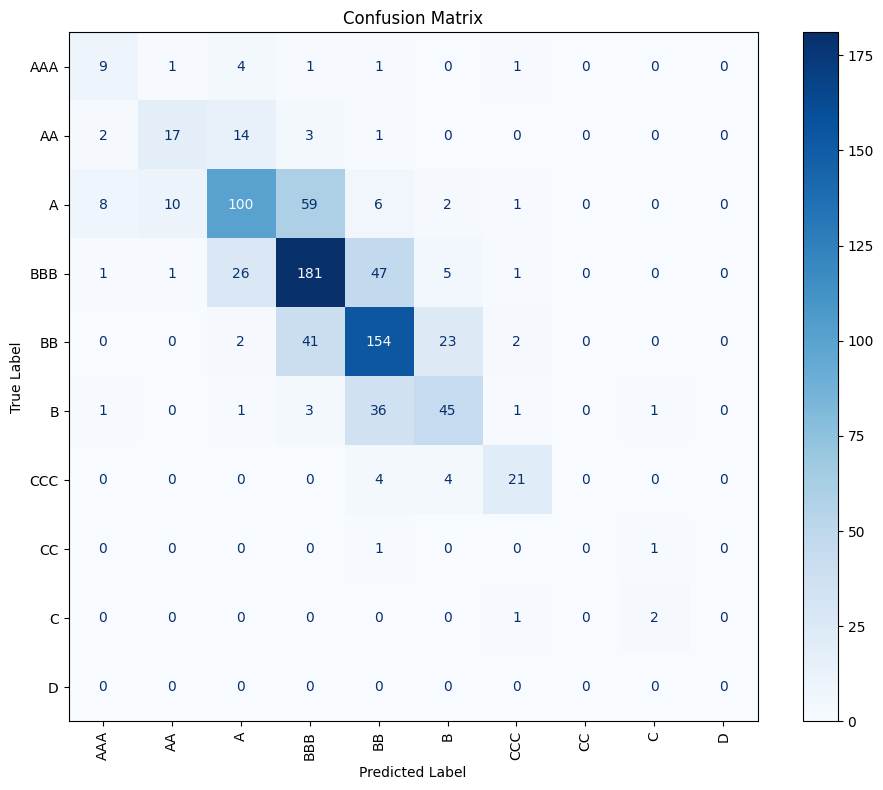

In [262]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix


conf_matrix = confusion_matrix(y_test, y_pred, labels=np.arange(0,10))

# Confusion Matrix Display
cm_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,display_labels=custom_mapping.keys())

# Plot Confusion Matrix
plt.figure(figsize=(10, 8))
cm_display.plot(cmap='Blues', ax=plt.gca(), xticks_rotation='vertical')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

In [263]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

X = df.iloc[:,30:153].select_dtypes(include=['int64', 'float64'])

Y = df['Rating']
custom_mapping = {'AAA': 0, 'AA': 1, 'A': 2, 'BBB': 3, 'BB': 4, 'B': 5, 'CCC': 6,"CC":7,"C":8,"D":9}
Y_encoded = Y.map(custom_mapping)

X_train, X_test, y_train, y_test = train_test_split(X, Y_encoded, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(max_iter=5000,multi_class='multinomial',penalty="l1",solver="saga") 

model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)

# Calculate the share of the majority class for each prediction
majority_class_share_baseline = y_test.value_counts(normalize=True).max()
print("majority baseline:", majority_class_share_baseline)

Accuracy: 0.6217494089834515
F1 Score: 0.6177548182850411
majority baseline: 0.30969267139479906


In [264]:
# Get feature names
feature_names = X.columns
# Get coefficients
coefficients = model.coef_
# Create a DataFrame to display coefficients along with feature names
coefficients_df = pd.DataFrame(coefficients, columns=feature_names)

coefficients_df

,cashAndCashEquivalents,shortTermInvestments,cashAndShortTermInvestments,netReceivables,inventory,otherCurrentAssets,totalCurrentAssets,propertyPlantEquipmentNet,goodwill,intangibleAssets,...,epsdiluted,weightedAverageShsOut,weightedAverageShsOutDil,EBIT,Ratio_A,Ratio_B,Ratio_C,Ratio_D,Ratio_E,Altman_Z
0,0.033019,-0.054132,0.000000,0.951954,0.008295,0.000000,0.000000,-0.167632,0.000000,0.756622,...,0.000000,0.739524,0.591781,-0.398402,0.593361,0.000000,0.519499,0.000000,0.000000,0.000000
1,-0.266632,0.014172,0.197015,0.193666,0.000000,-0.247663,0.493560,-0.843401,0.000000,-0.428147,...,0.051716,0.528037,0.452637,-0.029608,-0.609450,0.222507,0.517527,0.012383,-0.451942,0.000000
2,0.135698,0.070337,0.000000,0.353264,-0.216810,-0.077190,0.007086,0.000000,0.488709,0.164342,...,-0.130218,0.408170,0.204504,0.063410,-0.489896,0.230446,-0.511068,0.524433,0.000000,0.000000
3,0.000000,-0.664394,0.243795,0.523744,-0.284907,-0.098767,-0.694829,0.000000,0.340402,0.332423,...,-0.014590,0.000000,0.000000,0.085306,0.540449,-0.530045,-0.505204,0.084689,1.480072,0.288537
4,-0.000007,0.051251,-0.146687,-0.085838,-0.226641,0.140000,1.395056,0.711032,-0.103436,0.000000,...,0.000000,0.000000,0.026792,0.000000,0.000000,-0.283096,0.547907,-0.741674,0.000000,-0.331734
5,0.000000,0.000000,0.000000,-0.994825,-0.946736,0.218427,-0.111009,0.344977,-0.025100,-0.393142,...,0.016660,-0.972343,-0.857611,0.000000,0.000000,0.000000,-0.214166,0.000000,0.000000,0.000000
6,0.177032,-0.011280,0.000000,-0.839234,1.034620,0.000000,-0.685275,0.000000,-0.087352,0.000000,...,-0.163968,-0.314770,-0.744234,0.267117,0.107401,0.227015,0.000000,-0.363917,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,-0.024143,0.000000,0.000000,0.000000,0.747672,0.243293,0.000000,-0.260092,0.000000,0.000000,...,0.000000,0.000000,-0.187894,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


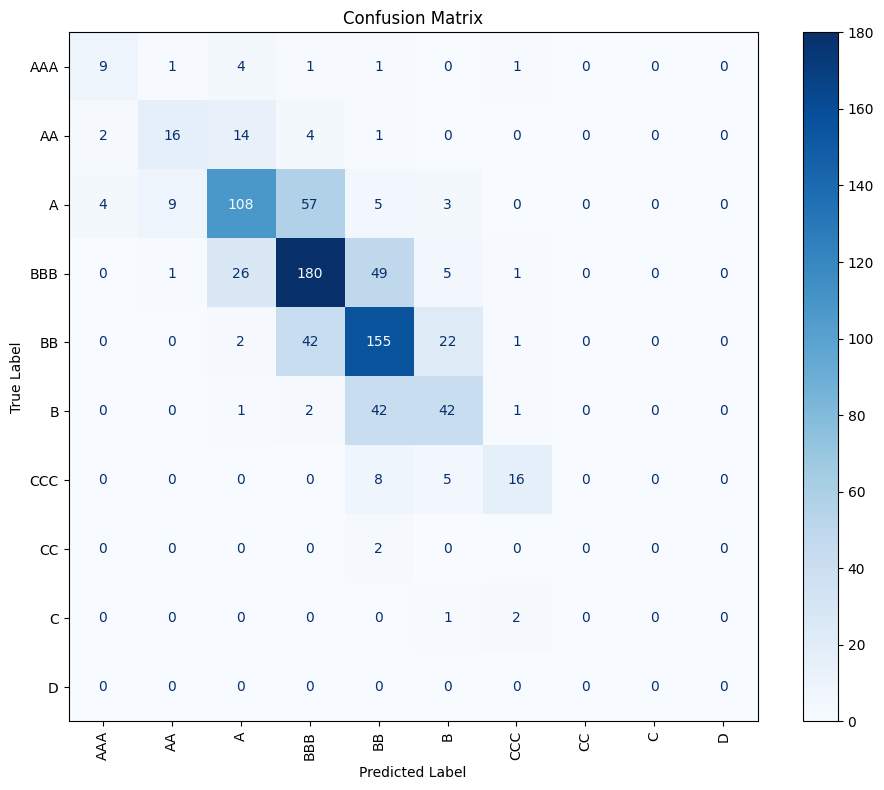

In [265]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred, labels=np.arange(0,10))

# Confusion Matrix Display
cm_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,display_labels=custom_mapping.keys())

# Plot Confusion Matrix
plt.figure(figsize=(10, 8))
cm_display.plot(cmap='Blues', ax=plt.gca(), xticks_rotation='vertical')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()




# Credit Rating Changing Prediction 

In [266]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

X = df.iloc[:,30:153].select_dtypes(include=['int64', 'float64'])

Y = df['Change Since Last Fixed Quarter Date']
Y = Y.map({-2: 'downgrade', -1: 'downgrade', 0: 'no change', 1: 'upgrade', 2: 'upgrade'})

custom_mapping = {'downgrade': 0, 'no change': 1, 'upgrade': 2}
Y_encoded = Y.map(custom_mapping)

X_train, X_test, y_train, y_test = train_test_split(X, Y_encoded , test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#model = LogisticRegression(max_iter=1000,multi_class='multinomial', solver='lbfgs') 
model = LogisticRegression(max_iter=5000,multi_class='multinomial',penalty="l1",solver="saga") 

model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)

# Calculate the share of the majority class for each prediction
majority_class_share_baseline = y_test.value_counts(normalize=True).max()
print("majority baseline:", majority_class_share_baseline)

Accuracy: 0.9444444444444444
F1 Score: 0.9231061210354539
majority baseline: 0.9468085106382979


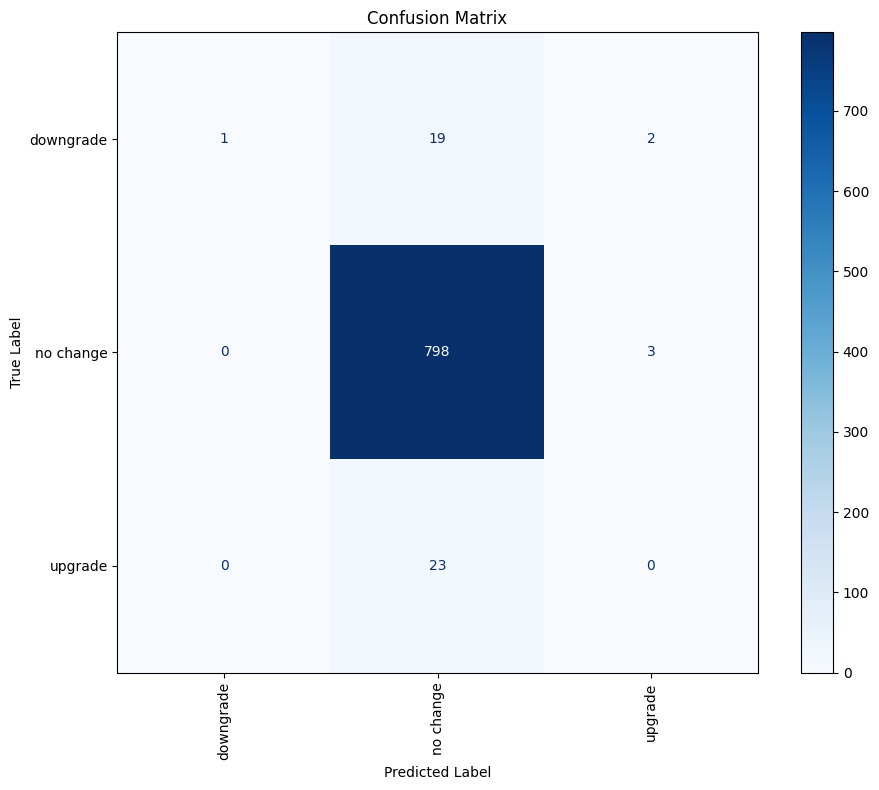

In [267]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)

# Confusion Matrix Display
cm_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,display_labels=custom_mapping.keys())

# Plot Confusion Matrix
plt.figure(figsize=(10, 8))
cm_display.plot(cmap='Blues', ax=plt.gca(), xticks_rotation='vertical')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

In [268]:
# Get feature names
feature_names = X.columns
# Get coefficients
coefficients = model.coef_
# Create a DataFrame to display coefficients along with feature names
coefficients_df = pd.DataFrame(coefficients, columns=feature_names)

coefficients_df

,cashAndCashEquivalents,shortTermInvestments,cashAndShortTermInvestments,netReceivables,inventory,otherCurrentAssets,totalCurrentAssets,propertyPlantEquipmentNet,goodwill,intangibleAssets,...,epsdiluted,weightedAverageShsOut,weightedAverageShsOutDil,EBIT,Ratio_A,Ratio_B,Ratio_C,Ratio_D,Ratio_E,Altman_Z
0,0.310245,-0.091526,0.000000,-0.083662,0.254654,0.104822,0.000000,0.147042,0.119194,0.00000,...,-0.031117,0.000000,0.000000,0.250660,-0.117926,0.0,0.000000,0.028712,0.000000,0.0
1,0.000000,0.157466,-0.192977,0.000000,0.000000,0.000000,0.026611,0.000000,-0.319655,0.00000,...,0.029266,0.514718,-0.533162,0.000000,0.204998,0.0,0.053514,0.000000,0.310494,0.0
2,-0.289650,0.000000,0.009321,0.243756,-0.007560,-0.319280,-0.023174,0.000000,0.000000,0.06895,...,0.000000,-0.236606,0.000000,-0.064969,0.000000,0.0,0.000000,0.000000,0.000000,0.0
